In [147]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [148]:
df = pd.read_csv('Customer-Churn-Prediction.csv') # import data set

In [149]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [150]:
df.shape

(7043, 21)

In [151]:
#df.InternetService.value_counts()

In [152]:
df.drop('customerID',axis='columns',inplace=True)

In [153]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [154]:
df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [155]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [156]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [157]:
Will_Churn_Ratio=1869/(5174+1869)

In [158]:
Will_Churn_Ratio

0.2653698707936959

<AxesSubplot:xlabel='Churn', ylabel='count'>

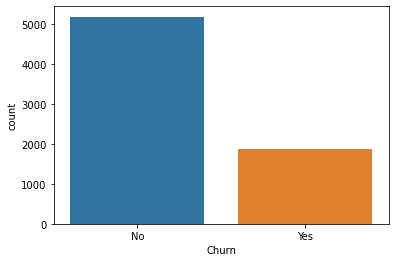

In [159]:
sns.countplot(x='Churn',data=df) 

<AxesSubplot:xlabel='InternetService', ylabel='count'>

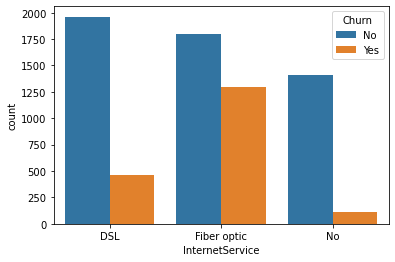

In [160]:
sns.countplot(x='InternetService',hue='Churn',data=df)

In [161]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

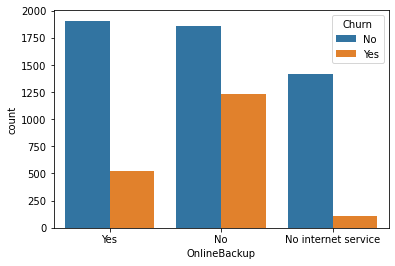

In [162]:
sns.countplot(x='OnlineBackup',hue='Churn',data=df)

In [163]:
df.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [164]:
#DSL=0=2421,No=2=1526,FiberOptic=1=3096

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

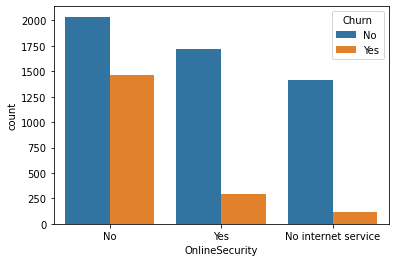

In [165]:
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)

In [166]:
df.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

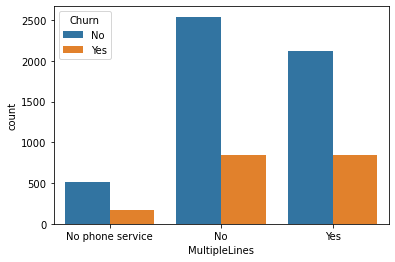

In [167]:
sns.countplot(x='MultipleLines',hue='Churn',data=df)

In [168]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

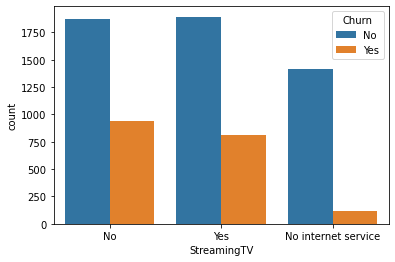

In [169]:
sns.countplot(x='StreamingTV',hue='Churn',data=df)

In [170]:
df.StreamingTV.value_counts()

No                     2809
Yes                    2708
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:xlabel='Contract', ylabel='count'>

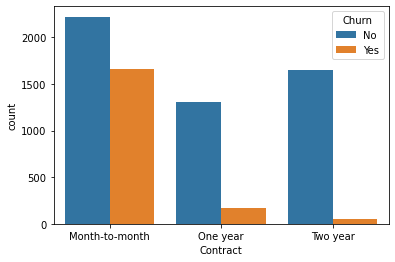

In [171]:
sns.countplot(x='Contract',hue='Churn',data=df)

In [172]:
df.StreamingTV.value_counts()

No                     2809
Yes                    2708
No internet service    1526
Name: StreamingTV, dtype: int64

<AxesSubplot:>

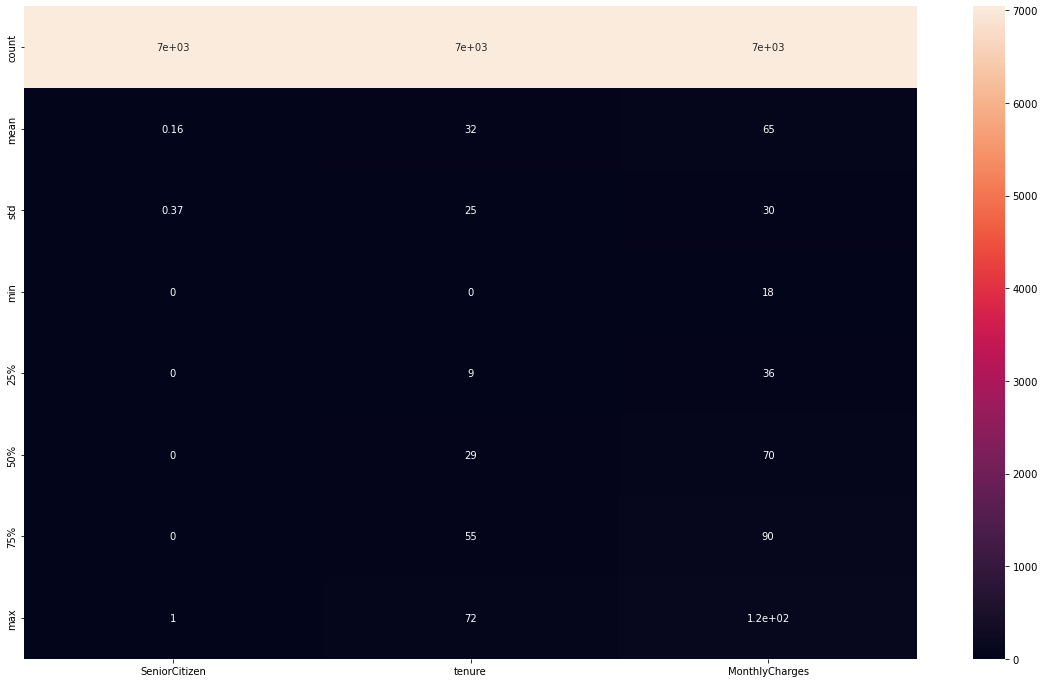

In [178]:
plt.figure(figsize=(20,12))
sns.heatmap(df.describe(),annot=True)

<AxesSubplot:>

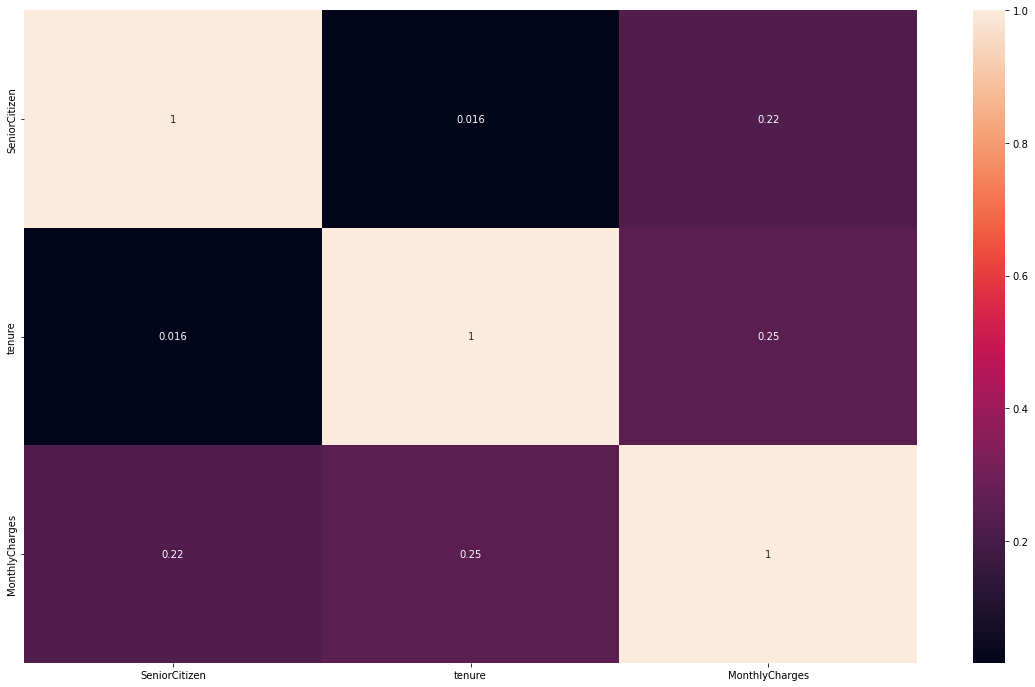

In [179]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

In [ ]:
MultipleLines       0-oh
InternetService     0-oh
OnlineSecurity      0-oh
OnlineBackup        0_oh
DeviceProtection    0_oh
TechSupport         0_oh
StreamingTV         0_oh
StreamingMovies     0_oh
Contract            0_oh
PaperlessBilling

In [108]:
total_columns=df.columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [110]:
df.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,6104,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1550,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,2609,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,2646,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3022,0


In [109]:
for col in total_columns:
    if df[col].dtype==np.number:
      continue
    df[col]=le.fit_transform(df[col])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8416\1774158773.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col].dtype==np.number:


In [ ]:
df.Churn.value_counts()

In [19]:
# My Rough works 
#using ctrl+/ for commenting multiple lines 
# use ctrl+/ again to uncomment multiple lines
#count_columns=len(df.columns)

#here u are using label encoder to do encoding
#total_columns=df.columns

# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()


# Task:1

In [ ]:
#task:1 Analysis the dataset using seaborn / matplotlib / scatter

# Task: 2

In [ ]:
#task:2 Do SMOTETomek sampling on given dataset and Create ML model and evaluate model by cross validation again

# Task: 3

In [ ]:
#task:3 Do Undersampling on given dataset and Create ML model and evaluate model by cross validation again


# Task: 4

In [ ]:
#task:4 Do Over sampling on given dataset and Create ML model and evaluate model by cross validation again


# Task: 5

In [ ]:
#task:5 Evaluate all results